In [357]:
## Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [358]:
## Step 2: Load Dataset
df = pd.read_csv("finance_economics_dataset.csv")
df.head()

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,01-01-2000,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,02-01-2000,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,03-01-2000,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,04-01-2000,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,05-01-2000,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [359]:
df = df.drop(df.columns[[21, 23]], axis=1)
df.iloc[1]

Date                                     02-01-2000
Stock Index                                 S&P 500
Open Price                                  2046.82
Close Price                                 2036.18
Daily High                                  2082.83
Daily Low                                   2009.53
Trading Volume                            690220415
GDP Growth (%)                                 3.19
Inflation Rate (%)                             4.95
Unemployment Rate (%)                          6.62
Interest Rate (%)                              2.19
Consumer Confidence Index                     101.0
Government Debt (Billion USD)                 16160
Corporate Profits (Billion USD)                1008
Forex USD/EUR                                   1.0
Forex USD/JPY                                 98.22
Crude Oil Price (USD per Barrel)              52.84
Gold Price (USD per Ounce)                  1957.73
Real Estate Index                            346.23
Retail Sales

In [360]:
df.isnull().sum()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                1
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Venture Capital Funding (Billion USD)    0
dtype: int64

In [361]:
missing_indices = df[df['Consumer Confidence Index'].isnull()].index
print("Missing at row index:", missing_indices.tolist())



Missing at row index: [2]


In [362]:
col = 'Consumer Confidence Index'
df[col] = df[col].fillna(df[col].median())


In [363]:
df.isnull().sum()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Venture Capital Funding (Billion USD)    0
dtype: int64

In [364]:
print(df.iloc[2][ 'Consumer Confidence Index'])


86.0


In [365]:
le = LabelEncoder()
df['Stock Index'] = le.fit_transform(df['Stock Index'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dow Jones': 0, 'NASDAQ': 1, 'S&P 500': 2}


In [366]:
print(df.head())
print(df.dtypes)


         Date  Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0  01-01-2000            0     2128.75      2138.48     2143.70    2100.55   
1  02-01-2000            2     2046.82      2036.18     2082.83    2009.53   
2  03-01-2000            0     1987.92      1985.26     2022.28    1978.37   
3  04-01-2000            0     4625.02      4660.47     4665.26    4595.46   
4  05-01-2000            2     1998.18      1982.18     2044.31    1966.44   

   Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0         2670411           -0.37                6.06                   6.10   
1       690220415            3.19                4.95                   6.62   
2       315284661            5.54                9.13                   2.60   
3        13098297           10.00                3.77                   2.20   
4       385306746            1.53                2.20                   8.20   

   ...  Government Debt (Billion USD)  Corporate P

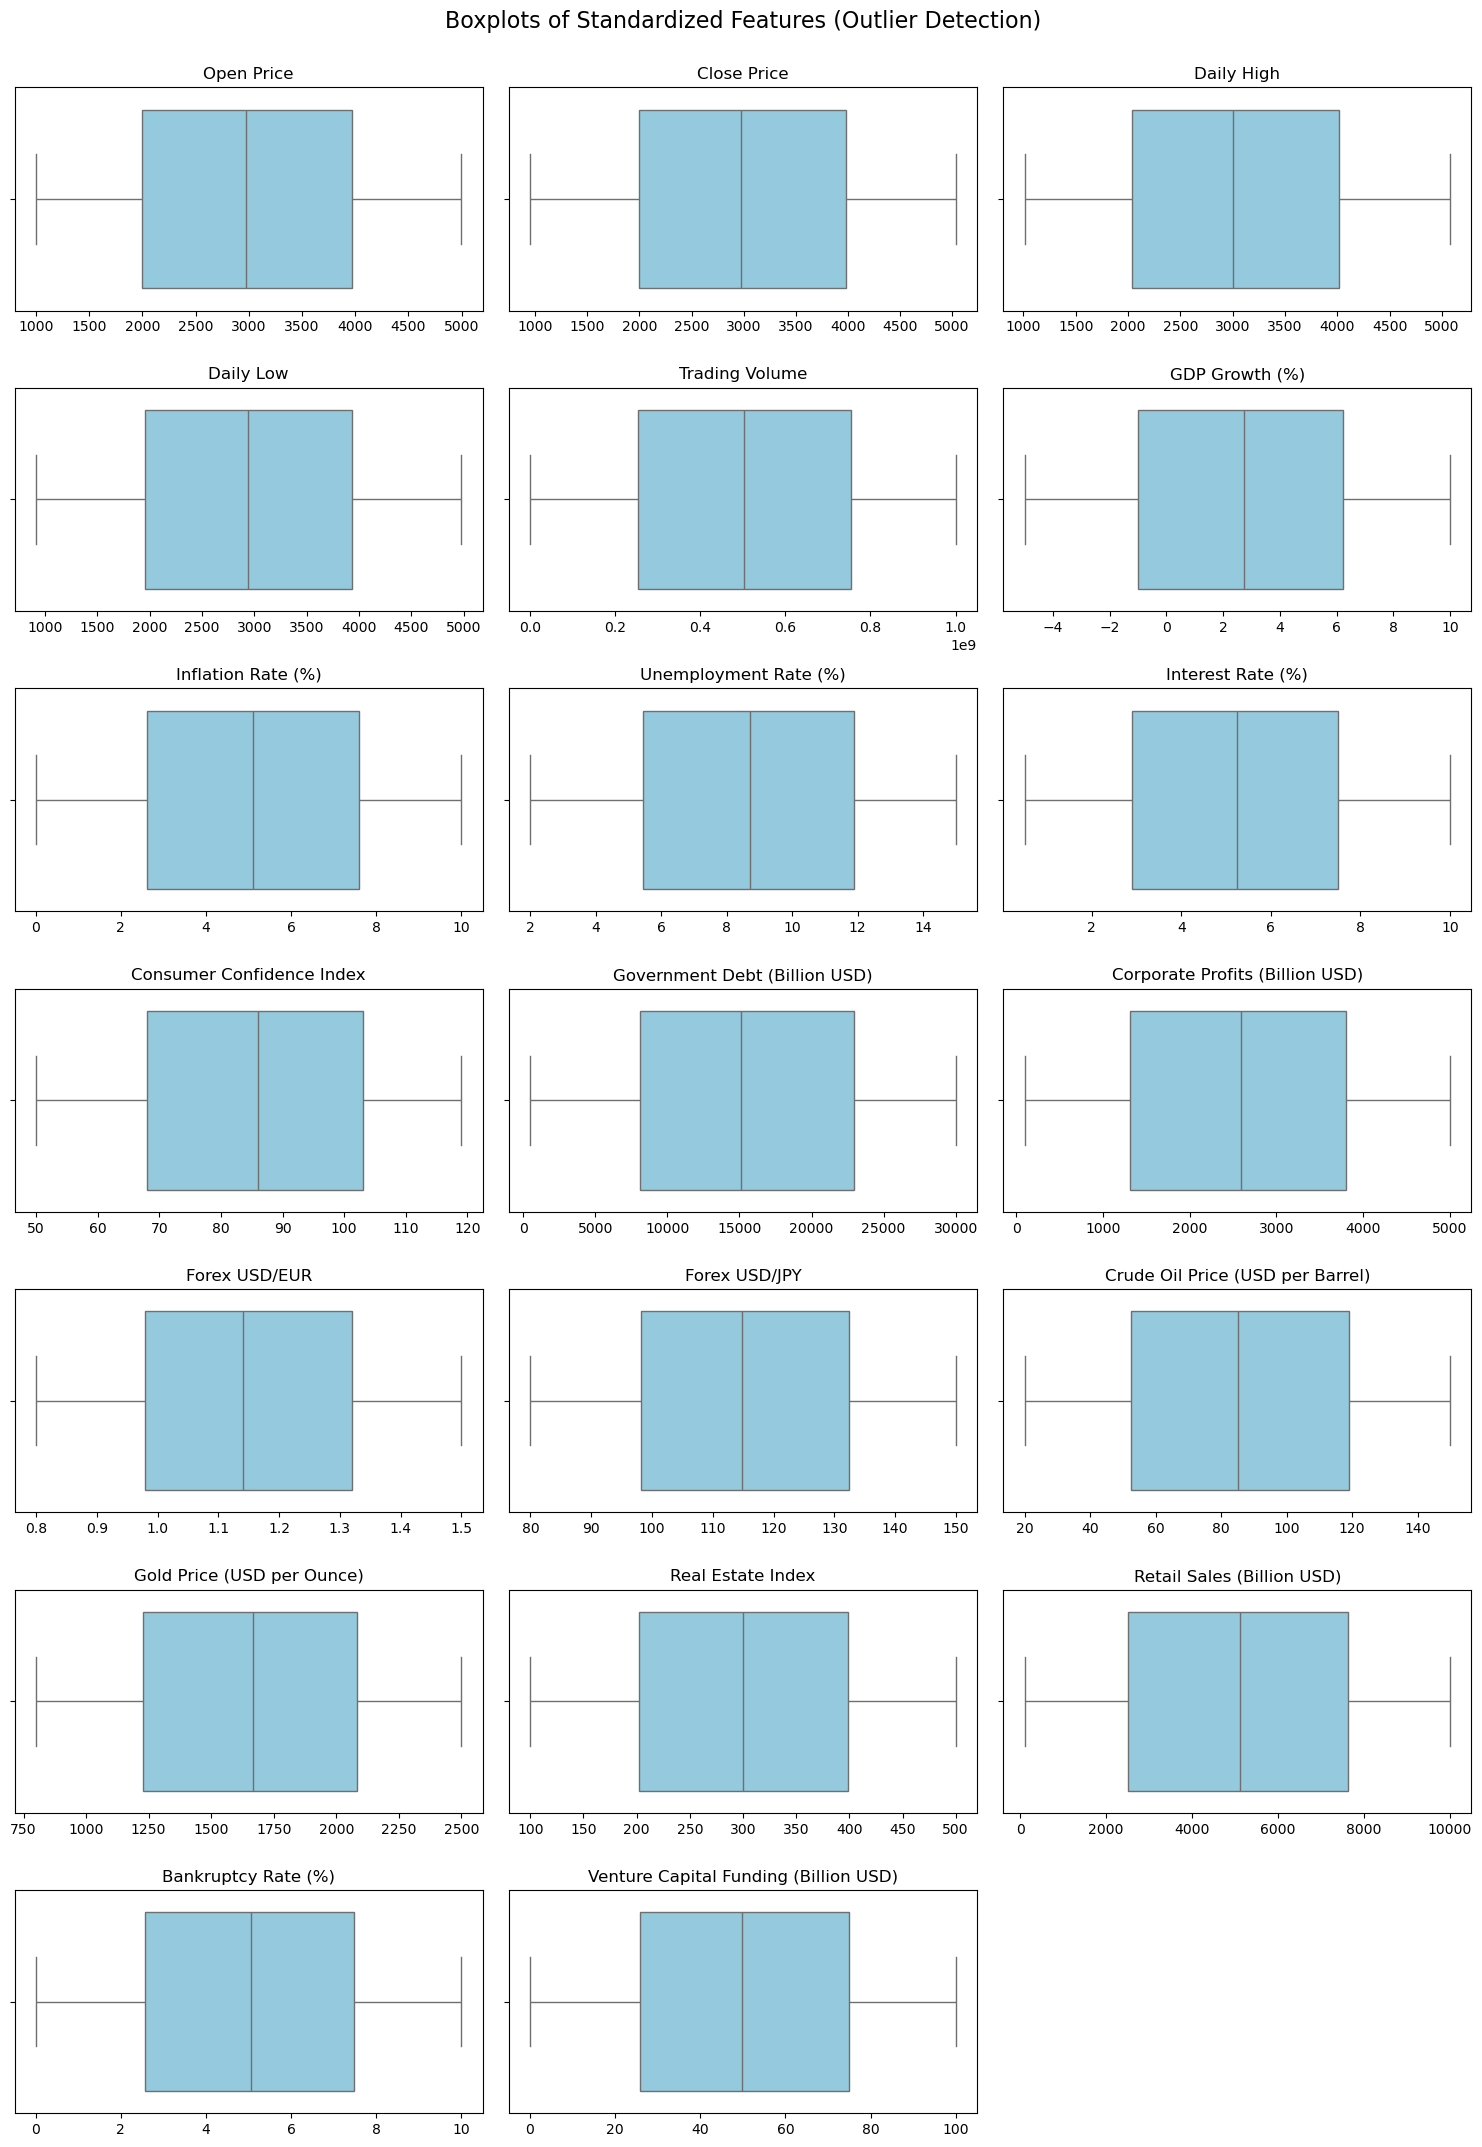

In [368]:
# Grid style boxplots of standardized numerical features
num_features = len(num_cols)
cols = 3  # Number of plots per row
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 5, rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle("Boxplots of Standardized Features (Outlier Detection)", fontsize=16, y=1.02)
plt.show()

In [369]:
df_filtered = df_original.copy()  # Start from original unstandardized data

for col in num_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Remove rows where column value is an outlier
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]


In [370]:
print("Original shape:", df_original.shape)
print("After removing outliers:", df_filtered.shape)


Original shape: (3000, 22)
After removing outliers: (3000, 22)


In [371]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", num_cols.tolist())
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Numerical columns: ['Open Price', 'Close Price', 'Daily High', 'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Venture Capital Funding (Billion USD)']


In [372]:
print(df[num_cols].describe())

         Open Price   Close Price    Daily High     Daily Low  Trading Volume  \
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03    3.000000e+03   
mean   1.042129e-16  1.563194e-16  5.660657e-16  1.042129e-16    8.644937e-17   
std    1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00    1.000167e+00   
min   -1.721017e+00 -1.759937e+00 -1.742746e+00 -1.760233e+00   -1.755275e+00   
25%   -8.571132e-01 -8.543167e-01 -8.536192e-01 -8.587143e-01   -8.706018e-01   
50%   -9.824516e-03 -3.533520e-03 -1.074066e-02 -4.415214e-03   -5.369876e-05   
75%    8.618743e-01  8.690868e-01  8.652515e-01  8.594311e-01    8.760103e-01   
max    1.750618e+00  1.782646e+00  1.786641e+00  1.765070e+00    1.737225e+00   

       GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
count    3.000000e+03        3.000000e+03           3.000000e+03   
mean     4.440892e-17        8.526513e-17          -2.131628e-17   
std      1.000167e+00        1.000167e+00           1.000167e+00  

In [373]:
# Save cleaned dataset to CSV
df_filtered.to_csv("cleaned_finance_data.csv", index=False)
